# Transformações geométricas - Parte 1 do Projeto de Visão

Vamos gerar uma imagem de entrada com algumas coordenadas conhecidas.  Desta seção você só vai precisar das coordenadas dos pontos na imagem de entrada e na imagem de saída

In [142]:
from sympy import symbols
from sympy.core.trace import Tr
from IPython.core.display import display_pretty
from sympy.printing.latex import *
from sympy import init_printing; init_printing()
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display
import math
import sympy as sp
from sympy import symbols
from sympy.core.trace import Tr
import matplotlib.pyplot as plt

from numpy import linalg

from matplotlib import colors

import cv2

import numpy as np

%matplotlib inline


sp_x = 30
sp_y = 30
x_blocks = 6
y_blocks = 6

In [143]:
# Cria uma imagem RGB  em branco
blank = 255*np.ones((sp_x * x_blocks,sp_y*y_blocks,3), np.uint8)

In [144]:
# Coordenadas de entrada de alguns pontos
points = [[1,1],
          [5,1],
          [1,3],
          [3,3],
          [5,3],
          [1,5],
          [5,5]]

In [145]:
# Cores a usar para os pontos
point_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

## Coordenadas dos pontos na imagem de entrada

Este loop imprime as coordenadas.

As cores dos pontos servem para identificá-los

In [146]:
sp_x = 30 # x spacing
sp_y = 30 # y spacing
point_size = 5
print("Posição dos pontos: (x_entrada, y_entrada)")

for i in range(len(points)):
    point_color = [int(255*canal) for canal in colors.colorConverter.colors[point_colors[i]]]
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    print(point_position)
    cv2.circle(blank,point_position, point_size, point_color, -1)


Posição dos pontos: (x_entrada, y_entrada)
(30, 30)
(150, 30)
(30, 90)
(90, 90)
(150, 90)
(30, 150)
(150, 150)


## Imagem de entrada

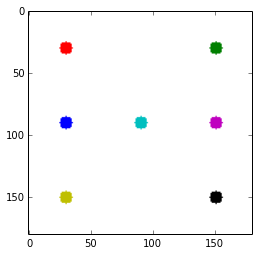

In [147]:
plt.imshow(blank)

Se precisar abrir a imagem fora deste *notebook*, use o arquivo `dots_pattern.png`


In [148]:
cv2.imwrite("dots_pattern.png", blank)

True

## Padrão de saída

Foi aplicada uma transformação à imagem de entrada, que gerou o seguinte padrão de saída:

In [149]:
saida = cv2.imread("patterns_transformed.png")

saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)

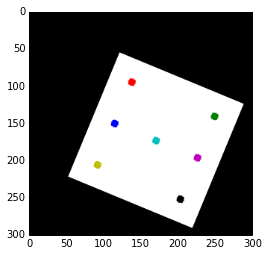

In [150]:
plt.imshow(saida)

Sabe-se que a imagem de saída é igual a uma combinação de rotações em torno de um ponto arbitrário e  redimensionamentos (escala) da imagem de entrada. Para simplificar, assuma que o redimensionamento é igual nos eixos $x$ e $y$

Cada ponto da imagem de saída está relacionado à sua posição na imagem de entrada pela seguinte transformação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

Na equação acima:

$\alpha = escala \cdot \cos(\theta)$ 

$\beta = escala \cdot \sin(\theta) $ 

$x_{entrada}$ é a posição $x$ de cada pixel na imagem de entrada

$y_{entrada}$ é a posição $y$ de cada pixel na imagem de entrada

$center$ é o centro de rotação

$x_{saída}$ é a coordenada $x$ do pixel na imagem de saída

$y_{saída}$ é a coordenada $y$ do pixel na imagem de saída


Com translação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 =
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix}
$$



# Matrizes de transformação com rotação, translação e escala


Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



# Atividade 1

Responda (no IPython Notebook): 

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída.

4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz?

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior?

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima.

7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo.

8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()* 

## Referências



[Shapiro and Shepard. Computer Vision. Seção 11.2, Capítulo 11](https://courses.cs.washington.edu/courses/cse576/book/ch11.pdf)

[http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0](http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0)



# 1)

A trasformação acima é definida por dois graus de liberdade: rotação e escala proporcional.

# 2)

Como a imagem fornece pontos coloridos como referência, apenas observando é possivel concluir as transformações ocorridas. Também podemos analisar a transformção através de sua matriz:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

# 3)

In [151]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
        

In [152]:
colors = ['b','g','r','c','m','y','k']

saidas = [(138,96),(249,141),(115,151),(170,174),(226,197),(92,206),(203,252)] #gimp
entradas = []

for i in range(len(points)):
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    entradas.append(point_position)

In [153]:
table = ListTable()
table.append(['Color','x entrada','y entrada','x saida','y saida'])
for i in range(len(entradas)):
    table.append([colors[i],entradas[i][0],entradas[i][1],saidas[i][0],saidas[i][1]])
table

Color,x entrada,y entrada,x saida,y saida
b,30,30,138,96
g,150,30,249,141
r,30,90,115,151
c,90,90,170,174
m,150,90,226,197
y,30,150,92,206
k,150,150,203,252


# 4)

A matriz contém quatro variáveis, então seria necessário um sistema com no minimo quatro equações. Um único ponto gera duas equações, então o minimo de correspondências necessárias seriam duas, para gerar quatro equações.

# 5)

Não necessariamente seria mais "util" usar mais correspondências, a utilidade é a mesma, porém com mais correspondência a margem de erro existente é reduzida.

# 6)

In [154]:
alpha, beta, c_x, c_y,  t_x, t_y, theta, scale, a, b =  sp.symbols("alpha, beta, c_x, c_y, t_x, t_y, theta, scale, a, b")

In [155]:
def make_translation(transx, transy):
    """
        Receives x and y translation values and returns a translation matrix
    """
    return sp.Matrix([[1, 0, transx],[0, 1, transy ],[0, 0, 1]])

def make_rotation(angle):
    """
        Counter-clockwise rotations to match OpenCV.
        TODO: really check if OpenCV rotates according to documentation
    """
    a = sp.cos(angle)
    b = sp.sin(angle)
    return sp.Matrix([[a, b, 0],[-b, a, 0 ],[0, 0, 1]])

def make_rotation_scale_a_b():
    """
        returns a generic rotation matrix where
        a = scale.cos(angle)
        b = scale.sin(angle)
    """
    return sp.Matrix([[a, b, 0],[-b, a, 0 ],[0, 0, 1]])


def make_scale(scale_f):
    return sp.Matrix([[scale, 0, 0],[0, scale, 0 ],[0, 0, 1]])
    
def make_column_point(x, y):
    return sp.Matrix([[x],[y],[1]])

In [156]:
# Pontos na entrada
x0, y0, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6 = sp.symbols("x_0, y_0, x_1, y_1, x_2, y_2, x_3, y_3, x_4, y_4, x_5, y_5, x_6, y_6")
p0 = make_column_point(x0, y0)
p1 = make_column_point(x1, y1)
p2 = make_column_point(x2, y2)
p3 = make_column_point(x3, y3)
p4 = make_column_point(x4, y4)
p5 = make_column_point(x5, y5)
p6 = make_column_point(x6, y6)

points_entrada = [p0, p1, p2, p3, p4, p5, p6]

# Pontos na saida
xs0, ys0, xs1, ys1, xs2, ys2, xs3, ys3, xs4, ys4, xs5, ys5, xs6, ys6 = sp.symbols("x_s0, y_s0, x_s1, y_s1, x_s2, y_s2, x_s3, y_s3, x_s4, y_s4, x_s5, y_s5, x_s6, y_s6")

ps0 = make_column_point(xs0, ys0)
ps1 = make_column_point(xs1, ys1)
ps2 = make_column_point(xs2, ys2)
ps3 = make_column_point(xs3, ys3)
ps4 = make_column_point(xs4, ys4)
ps5 = make_column_point(xs5, ys5)
ps6 = make_column_point(xs6, ys6)

points_saida = [ps0, ps1, ps2, ps3, ps4, ps5, ps6]

In [157]:
points_entrada

⎡⎡x₀⎤, ⎡x₁⎤, ⎡x₂⎤, ⎡x₃⎤, ⎡x₄⎤, ⎡x₅⎤, ⎡x₆⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢y₀⎥  ⎢y₁⎥  ⎢y₂⎥  ⎢y₃⎥  ⎢y₄⎥  ⎢y₅⎥  ⎢y₆⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣1 ⎦  ⎣1 ⎦  ⎣1 ⎦  ⎣1 ⎦  ⎣1 ⎦  ⎣1 ⎦  ⎣1 ⎦⎦

In [158]:
points_saida

⎡⎡x_s0⎤, ⎡x_s1⎤, ⎡x_s2⎤, ⎡x_s3⎤, ⎡x_s4⎤, ⎡x_s5⎤, ⎡x_s6⎤⎤
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎢⎢y_s0⎥  ⎢y_s1⎥  ⎢y_s2⎥  ⎢y_s3⎥  ⎢y_s4⎥  ⎢y_s5⎥  ⎢y_s6⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎣⎣ 1  ⎦  ⎣ 1  ⎦  ⎣ 1  ⎦  ⎣ 1  ⎦  ⎣ 1  ⎦  ⎣ 1  ⎦  ⎣ 1  ⎦⎦

In [159]:
rotab = make_rotation_scale_a_b()
trans = make_translation(t_x, t_y)
M = trans*rotab

In [160]:
M

⎡a   b  tₓ ⎤
⎢          ⎥
⎢-b  a  t_y⎥
⎢          ⎥
⎣0   0   1 ⎦

In [161]:
equations = []
system_eq = [] # Sistema de equações supondo =0
left_side = [] # Lado esquerdo do sistema
right_side = [] # Lado direito do sistema
sys = []

In [162]:
for p in points_entrada:
    produto = M*p
    equations.append(produto)

In [163]:
for i in range(len(equations)):
    for j in range(len(equations[i][:-1])): # -1 excludes the homogeneous coordinate (extra 1 at the end)
        left_side.append(equations[i][j])
        right_side.append(points_saida[i][j])
        eq = equations[i][j] - points_saida[i][j]
        sys.append(eq)

In [164]:
for equation in sys:
    display(equation)

# 7)

http://glowingpython.blogspot.com.br/2012/03/linear-regression-with-numpy.html

In [165]:
In_ex = sp.Matrix([[x0,y0,1,0],[y0,-x0,0,1],[x1,y1,1,0],[y1,-x1,0,1],[x2,y2,1,0],[y2,-x2,0,1],[x3,y3,1,0],[y3,-x3,0,1],[x4,y4,1,0],[y4,-x4,0,1],[x5,y5,1,0],[y5,-x5,0,1],[x6,y6,1,0],[y6,-x6,0,1],])

In [166]:
In_ex

⎡x₀  y₀   1  0⎤
⎢             ⎥
⎢y₀  -x₀  0  1⎥
⎢             ⎥
⎢x₁  y₁   1  0⎥
⎢             ⎥
⎢y₁  -x₁  0  1⎥
⎢             ⎥
⎢x₂  y₂   1  0⎥
⎢             ⎥
⎢y₂  -x₂  0  1⎥
⎢             ⎥
⎢x₃  y₃   1  0⎥
⎢             ⎥
⎢y₃  -x₃  0  1⎥
⎢             ⎥
⎢x₄  y₄   1  0⎥
⎢             ⎥
⎢y₄  -x₄  0  1⎥
⎢             ⎥
⎢x₅  y₅   1  0⎥
⎢             ⎥
⎢y₅  -x₅  0  1⎥
⎢             ⎥
⎢x₆  y₆   1  0⎥
⎢             ⎥
⎣y₆  -x₆  0  1⎦

In [167]:
Out_ex = sp.Matrix([[xs0],[ys0],[xs2],[ys1],[xs2],[ys2],[xs3],[ys3],[xs4],[ys4],[xs5],[ys5],[xs6],[ys6]])

In [168]:
Out_ex

⎡x_s0⎤
⎢    ⎥
⎢y_s0⎥
⎢    ⎥
⎢x_s2⎥
⎢    ⎥
⎢y_s1⎥
⎢    ⎥
⎢x_s2⎥
⎢    ⎥
⎢y_s2⎥
⎢    ⎥
⎢x_s3⎥
⎢    ⎥
⎢y_s3⎥
⎢    ⎥
⎢x_s4⎥
⎢    ⎥
⎢y_s4⎥
⎢    ⎥
⎢x_s5⎥
⎢    ⎥
⎢y_s5⎥
⎢    ⎥
⎢x_s6⎥
⎢    ⎥
⎣y_s6⎦

In [169]:
entradas

In [170]:
saidas

In [171]:
In = sp.Matrix([[entradas[0][0],entradas[0][1],1,0],[entradas[0][1],-entradas[0][0],0,1],[entradas[1][0],entradas[1][1],1,0],[entradas[1][1],-entradas[1][0],0,1],[entradas[2][0],entradas[2][1],1,0],[entradas[2][1],-entradas[2][0],0,1],[entradas[3][0],entradas[3][1],1,0],[entradas[3][1],-entradas[3][0],0,1],[entradas[4][0],entradas[4][1],1,0],[entradas[4][1],-entradas[4][0],0,1],[entradas[5][0],entradas[5][1],1,0],[entradas[5][1],-entradas[5][0],0,1],[entradas[6][0],entradas[6][1],1,0],[entradas[6][1],-entradas[6][0],0,1]])

In [172]:
In

⎡30    30   1  0⎤
⎢               ⎥
⎢30   -30   0  1⎥
⎢               ⎥
⎢150   30   1  0⎥
⎢               ⎥
⎢30   -150  0  1⎥
⎢               ⎥
⎢30    90   1  0⎥
⎢               ⎥
⎢90   -30   0  1⎥
⎢               ⎥
⎢90    90   1  0⎥
⎢               ⎥
⎢90   -90   0  1⎥
⎢               ⎥
⎢150   90   1  0⎥
⎢               ⎥
⎢90   -150  0  1⎥
⎢               ⎥
⎢30   150   1  0⎥
⎢               ⎥
⎢150  -30   0  1⎥
⎢               ⎥
⎢150  150   1  0⎥
⎢               ⎥
⎣150  -150  0  1⎦

In [173]:
saidas

In [186]:
Out = sp.Matrix([saidas[0][0],saidas[0][1],saidas[1][0],saidas[1][1],saidas[2][0],saidas[2][1],saidas[3][0],saidas[3][1],saidas[4][0],saidas[4][1],saidas[5][0],saidas[5][1],saidas[6][0],saidas[6][1]])

In [187]:
Out

⎡138⎤
⎢   ⎥
⎢96 ⎥
⎢   ⎥
⎢249⎥
⎢   ⎥
⎢141⎥
⎢   ⎥
⎢115⎥
⎢   ⎥
⎢151⎥
⎢   ⎥
⎢170⎥
⎢   ⎥
⎢174⎥
⎢   ⎥
⎢226⎥
⎢   ⎥
⎢197⎥
⎢   ⎥
⎢92 ⎥
⎢   ⎥
⎢206⎥
⎢   ⎥
⎢203⎥
⎢   ⎥
⎣252⎦

In [213]:
Parametros = linalg.lstsq(In,Out)[0] # obtaining the parameters

In [214]:
Parametros

array([[   0.92333333],
       [  -0.38166667],
       [ 121.67857143],
       [  56.40714286]])

In [215]:
alpha = Parametros[0]
beta = Parametros[1]
tx = Parametros[2]
ty = Parametros[3]

In [223]:
Matriz = np.float32([[alpha,-beta,tx],[-alpha,-beta,ty]])
#Matriz = sp.Matrix([[alpha,-beta,tx],[-alpha,-beta,ty]])

In [224]:
Matriz

array([[[   0.92333335],
        [   0.38166666],
        [ 121.67857361]],

       [[  -0.92333335],
        [   0.38166666],
        [  56.40714264]]], dtype=float32)

In [218]:
img = cv2.imread('dots_pattern.jpg')

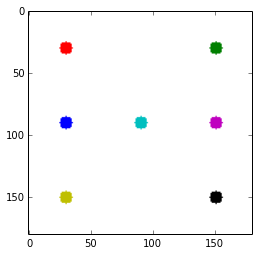

In [219]:
plt.imshow(blank)

In [225]:
cols,rows = blank.shape[:2]

In [226]:
Img = cv2.warpAffine(blank,Matriz,(cols,rows)) 

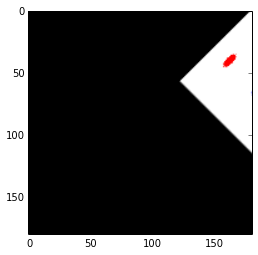

In [228]:
plt.imshow(Img)